In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Step 1: Data Collection
def fetch_stock_data(ticker, start, end):
    stock_data = yf.download(ticker, start=start, end=end)
    return stock_data

In [10]:
# Step 2: Data Preprocessing
def preprocess_data(stock_data):
    stock_data = stock_data[['Open', 'High', 'Low', 'Close']].dropna()
    stock_data['Target'] = stock_data['Close'].shift(-1)
    stock_data = stock_data.dropna()
    return stock_data

In [11]:
# Call the functions to fetch and preprocess the data
# Define ticker, start_date, and end_date
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-01-01"

stock_data = fetch_stock_data(ticker, start_date, end_date) # Fetch the data
stock_data = preprocess_data(stock_data)  # Preprocess the data

# Now you can access stock_data and its attributes
print("Stock Data Shape:", stock_data.shape)

[*********************100%***********************]  1 of 1 completed

Stock Data Shape: (1005, 5)


In [14]:
# Step 3: Display Data Attributes
print("\nStock Data Description:")
print(stock_data.describe())



Stock Data Description:
Price          Open         High          Low        Close       Target
Ticker         AAPL         AAPL         AAPL         AAPL             
count   1005.000000  1005.000000  1005.000000  1005.000000  1005.000000
mean     138.193401   139.810515   136.690216   138.325320   138.443240
std       33.425861    33.554617    33.293386    33.434533    33.411547
min       55.277748    55.379539    51.528419    54.378586    54.378586
25%      120.859428   121.975070   119.216088   120.718330   120.898590
50%      143.094298   144.784541   141.546463   143.241913   143.260056
75%      163.929671   165.969534   162.367502   163.689529   163.692398
max      196.580412   198.168771   195.567849   196.669754   196.669754


In [15]:
print("Stock Data Head:")
print(stock_data.head())


Stock Data Head:
Price            Open       High        Low      Close     Target
Ticker           AAPL       AAPL       AAPL       AAPL           
Date                                                             
2020-01-02  71.627092  72.681289  71.373218  72.620842  71.914825
2020-01-03  71.847125  72.676454  71.689965  71.914825  72.487854
2020-01-06  71.034717  72.526541  70.783256  72.487854  72.146904
2020-01-07  72.497491  72.753785  71.926877  72.146904  73.307510
2020-01-08  71.849533  73.609745  71.849533  73.307510  74.864632


In [16]:
print("Stock Data tail:")
print(stock_data.tail())

Stock Data tail:
Price             Open        High         Low       Close      Target
Ticker            AAPL        AAPL        AAPL        AAPL            
Date                                                                  
2023-12-21  194.674384  195.647256  192.093280  193.264694  192.192566
2023-12-22  193.761066  193.989405  191.567141  192.192566  191.646576
2023-12-26  192.202502  192.480466  191.428174  191.646576  191.745819
2023-12-27  191.090629  192.093281  189.700797  191.745819  192.172714
2023-12-28  192.728641  193.244865  191.765691  192.172714  191.130325


In [18]:
print("\nStock Data Info:")
print(stock_data.info())


Stock Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2020-01-02 to 2023-12-28
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Open, AAPL)   1005 non-null   float64
 1   (High, AAPL)   1005 non-null   float64
 2   (Low, AAPL)    1005 non-null   float64
 3   (Close, AAPL)  1005 non-null   float64
 4   (Target, )     1005 non-null   float64
dtypes: float64(5)
memory usage: 47.1 KB
None


In [19]:
# Step 3: Model Building
def train_models(X_train, y_train):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(X_train, y_train)

    rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_reg.fit(X_train, y_train)

    gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    gb_reg.fit(X_train, y_train)

    svr = SVR()
    svr.fit(X_train, y_train)

    mlp = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
    mlp.fit(X_train, y_train)

    return lin_reg, tree_reg, rf_reg, gb_reg, svr, mlp

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Example feature engineering (modify as needed)
X = stock_data[['Open', 'High', 'Low']]  # Input features
y = stock_data['Close']  # Target feature

# Optional: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')


In [23]:
lin_reg, tree_reg, rf_reg, gb_reg, svr, mlp = train_models(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate Linear Regression
lin_pred = lin_reg.predict(X_test)
mae = mean_absolute_error(y_test, lin_pred)
rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
r2 = r2_score(y_test, lin_pred)

print(f"Linear Regression - MAE: {mae}, RMSE: {rmse}, R²: {r2}")


Linear Regression - MAE: 1.9259609656881904, RMSE: 2.5905597357301486, R²: 0.9936981870250916


In [24]:
# Step 4: Evaluation
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return mae, rmse, r2, predictions


[*********************100%***********************]  1 of 1 completed


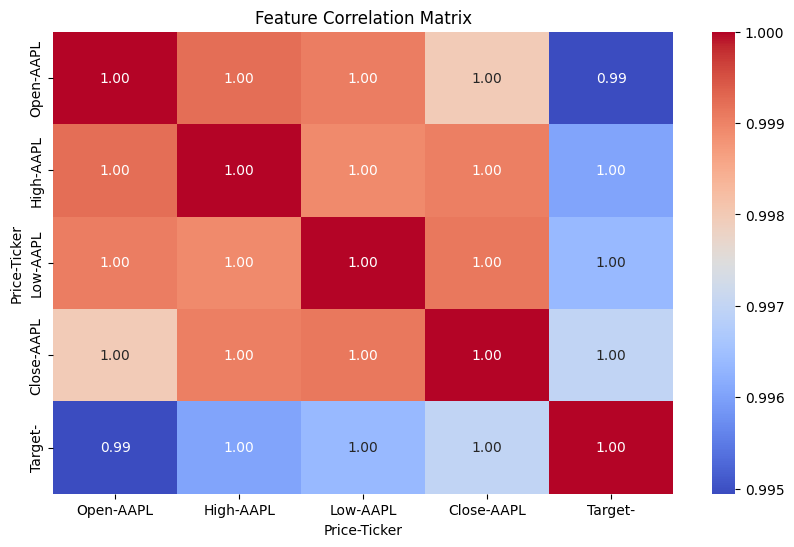

Linear Regression Metrics:
MAE: 1.9259609656881904, RMSE: 2.5905597357301486, R²: 0.9936981870250916



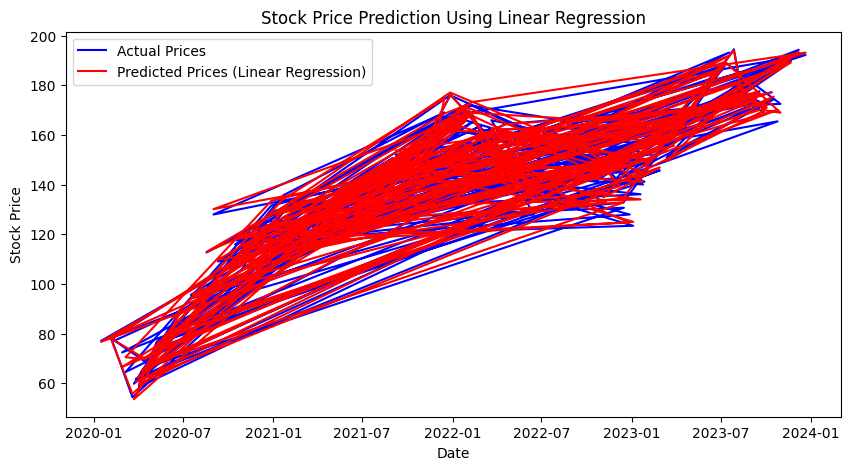

Decision Tree Metrics:
MAE: 2.9425999845438335, RMSE: 3.868213846542082, R²: 0.9859492586855252



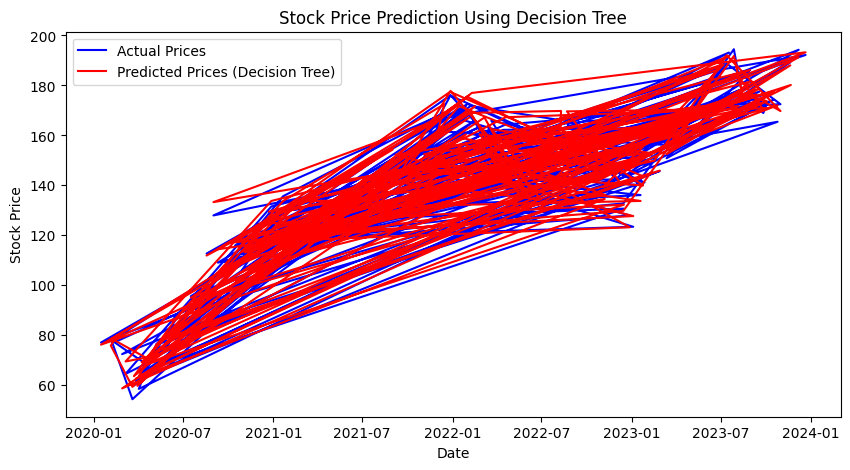

Random Forest Metrics:
MAE: 2.1743566461819324, RMSE: 2.9109334348241696, R²: 0.9920431194832519



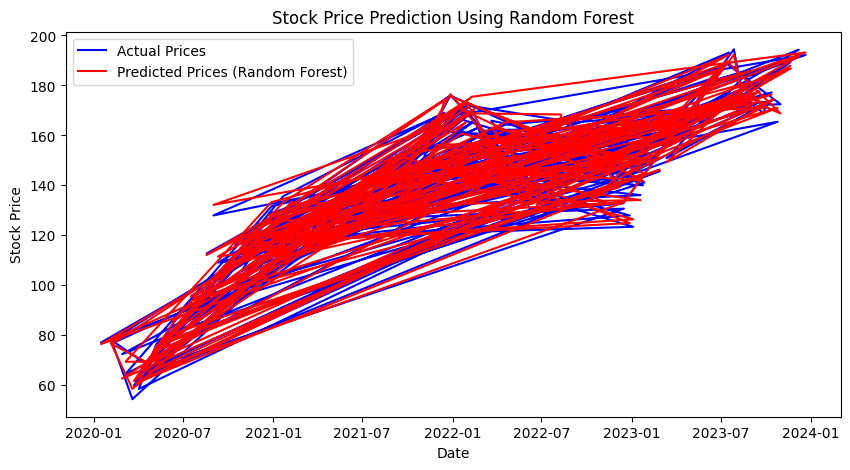

Gradient Boosting Metrics:
MAE: 2.138383034376459, RMSE: 2.867729364306772, R²: 0.9922775587244028



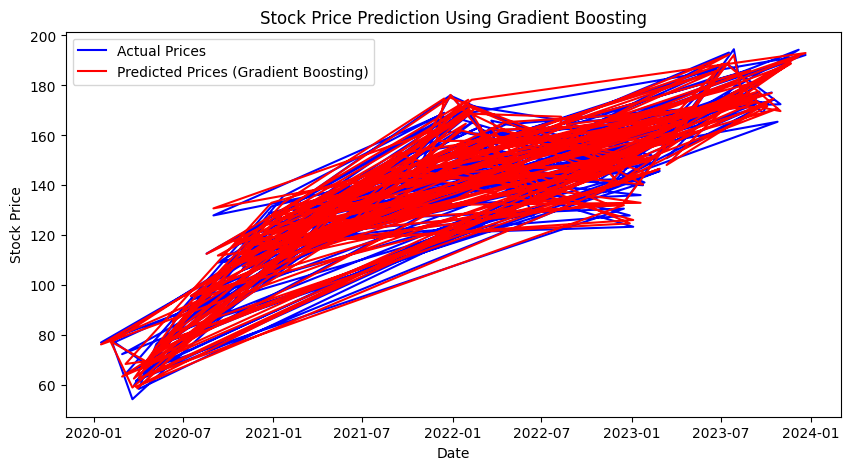

Support Vector Machine Metrics:
MAE: 3.0515273728004555, RMSE: 4.900586922199672, R²: 0.9774485494758768



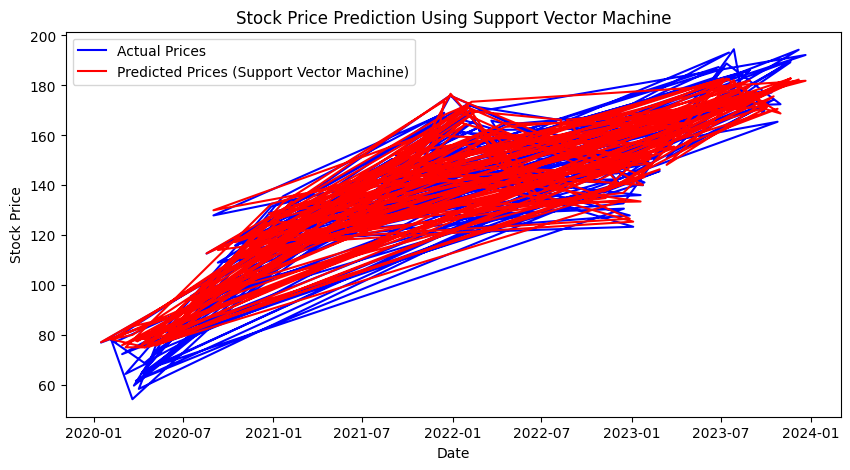

Neural Network Metrics:
MAE: 2.0714426627038316, RMSE: 2.808199984098725, R²: 0.9925948415975185



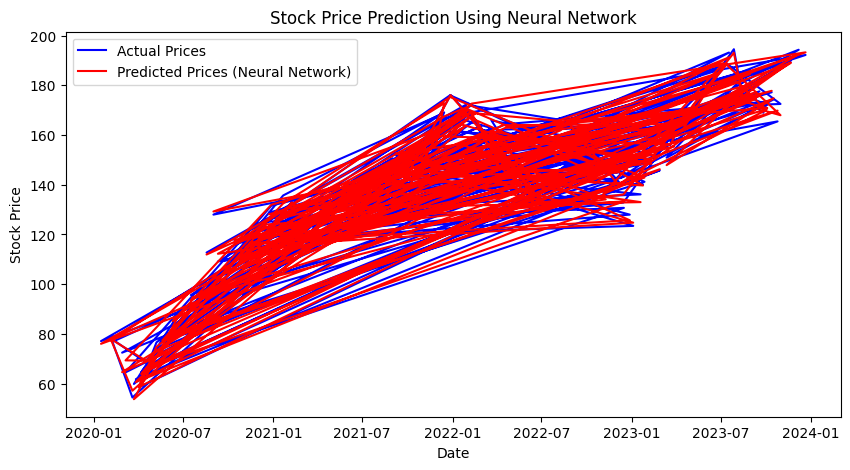

In [25]:
# Step 5: Visualization
def plot_predictions(y_test, predictions, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, predictions, label=f'Predicted Prices ({model_name})', color='red')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Prediction Using {model_name}')
    plt.legend()
    plt.show()

def plot_correlation_matrix(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.show()

if __name__ == "__main__":
    ticker = "AAPL"
    start_date = "2020-01-01"
    end_date = "2024-01-01"

    stock_data = fetch_stock_data(ticker, start_date, end_date)
    stock_data = preprocess_data(stock_data)

    plot_correlation_matrix(stock_data)

    X = stock_data[['Open', 'High', 'Low', 'Close']]
    y = stock_data['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lin_reg, tree_reg, rf_reg, gb_reg, svr, mlp = train_models(X_train, y_train)

    models = {"Linear Regression": lin_reg, "Decision Tree": tree_reg, "Random Forest": rf_reg, "Gradient Boosting": gb_reg, "Support Vector Machine": svr, "Neural Network": mlp}

    for model_name, model in models.items():
        mae, rmse, r2, predictions = evaluate_model(model, X_test, y_test)
        print(f"{model_name} Metrics:")
        print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}\n")
        plot_predictions(y_test, predictions, model_name)
